## Import Packages

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from collections import Counter

import os

## Load Data Sets

In [2]:
# Loading data sets
train_data = pd.read_csv("C:\\Users\\yy\Desktop\\SpringBoard Data Science\\Capstone-Project-2---Identify-Genetic-Disorder-is-Children\\Data\\Raw Data\\train.csv")

test_data = pd.read_csv("C:\\Users\\yy\Desktop\\SpringBoard Data Science\\Capstone-Project-2---Identify-Genetic-Disorder-is-Children\\Data\\Raw Data\\test.csv")

In [3]:
# Checking to make sure data set loaded properly
train_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
test_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


## Column Names and Descriptions (Attached with data set)

## Evaluation of Train Data Set

Since I will be training my model based on the training data set, I will be focusing my data exploration on the train_data set. Any data clean up applied and moved foward in the train_data can be applied to the test_data, so my model can be used on the test_data set with the same parameters.

In [5]:
# Identify all the columns
train_data.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

Let's first clean up the column names so they are readable and consistent for future processing.

In [6]:
train_data.rename(columns= {"Patient Id" : "Patient_Id",
                            "Patient Age" : "Patient_Age",
                            "Genes in mother's side" : "Mother_Gene",
                            "Inherited from father" : "Father_Gene",
                            "Maternal gene" : "Maternal_Gene",
                            "Paternal gene" : "Paternal_Gene",
                            "Blood cell count (mcL)" : "Blood_Cell",
                            "Patient First Name" : "Patient_Name",
                            "Family Name" : "Family_Name",
                            "Father's name" : "Father_Name",
                            "Mother's age" : "Mother_Age",
                            "Father's age" : "Father_Age",
                            "Institute Name" : "Institute_Name",
                            "Location of Institute" : "Institute_Location",
                            "Respiratory Rate (breaths/min)" : "Respiratory_Rate",
                            "Heart Rate (rates/min" : "Heart_Rate",
                            "Test 1" : "Test_1",
                            "Test 2" : "Test_2",
                            "Test 3" : "Test_3",
                            "Test 4" : "Test_4",
                            "Test 5" : "Test_5",
                            "Parental consent" : "Parental_Consent",
                            "Follow-up" : "Follow_Up",
                            "Birth asphyxia" : "Birth_Asphyxia",
                            "Autopsy shows birth defect (if applicable)" : "Autopsy_Birth_Defect",
                            "Place of birth" : "Birth_Place",
                            "Folic acid details (peri-conceptional)" : "Folic_Acid_Details",
                            "H/O serious maternal illness" : "Maternal_Illness",
                            "H/O radiation exposure (x-ray)" : "Radiation_Exposure",
                            "H/O substance abuse" : "Substance_Abuse",
                            "Assisted conception IVF/ART" : "Assisted_Conception",
                            "History of anomalies in previous pregnancies" : "History_Pregnancies",
                            "No. of previous abortion" : "Previous_Abortions",
                            "Birth defects" : "Birth_Defects",
                            "White Blood cell count (thousand per microliter)" : "White_Blood_Cell",
                            "Blood test result" : "Blood_Test",
                            "Symptom 1" : "Symptom_1",
                            "Symptom 2" : "Symptom_2",
                            "Symptom 3" : "Symptom_3",
                            "Symptom 4" : "Symptom_4",
                            "Symptom 5" : "Symptom_5",
                            "Genetic Disorder" : "Genetic_Disorder",
                            "Disorder Subclass" : "Disorder_Subclass"}, 
                  inplace=True)

In [7]:
# Check to see column names have been changed
train_data.columns

Index(['Patient_Id', 'Patient_Age', 'Mother_Gene', 'Father_Gene',
       'Maternal_Gene', 'Paternal_Gene', 'Blood_Cell', 'Patient_Name',
       'Family_Name', 'Father_Name', 'Mother_Age', 'Father_Age',
       'Institute_Name', 'Institute_Location', 'Status', 'Respiratory_Rate',
       'Heart_Rate', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid_Details',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Pregnancies', 'Previous_Abortions',
       'Birth_Defects', 'White_Blood_Cell', 'Blood_Test', 'Symptom_1',
       'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

The `Genetic_Disorder` and `Disorder_Subclass` are the two target columns that will need to be identified for the test_data.

In [8]:
# Transposed data set of the first 30 to glance at the dataset
train_data.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Patient_Id,PID0x6418,PID0x25d5,PID0x4a82,PID0x4ac8,PID0x1bf7,PID0x44fe,PID0x28de,PID0x4f8f,PID0x8ce3,PID0x8660,...,PID0x5560,PID0x71fc,PID0x3b21,PID0x5029,PID0x5c9f,PID0x42c5,PID0x2de,PID0x2db9,PID0x2df9,PID0x8c46
Patient_Age,2.0,4.0,6.0,12.0,11.0,14.0,3.0,3.0,11.0,4.0,...,2.0,10.0,NaN,4.0,5.0,13.0,NaN,11.0,NaN,4.0
Mother_Gene,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,...,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No
Father_Gene,No,Yes,No,No,No,No,No,No,No,Yes,...,No,Yes,No,Yes,Yes,No,No,Yes,No,No
Maternal_Gene,Yes,No,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,NaN,NaN,No,No,Yes
Paternal_Gene,No,No,No,No,Yes,No,Yes,Yes,No,Yes,...,No,No,No,No,Yes,No,Yes,No,No,No
Blood_Cell,4.760603,4.910669,4.893297,4.70528,4.720703,5.103188,4.90108,4.964816,5.209058,4.752272,...,4.808872,5.07772,4.998895,4.96348,4.661035,4.854488,4.710696,5.117909,4.991328,4.658102
Patient_Name,Richard,Mike,Kimberly,Jeffery,Johanna,Richard,Mary,Emma,Willie,John,...,Patricia,Dorothy,Vennie,Willard,Jeffrey,Richard,Mary,Felecia,Dean,Nathan
Family_Name,NaN,NaN,NaN,Hoelscher,Stutzman,NaN,NaN,Bryant,Camacho,Sandoval,...,Robinson,Somogyi,Pang,NaN,NaN,NaN,NaN,NaN,Olsen,Sanchez
Father_Name,Larre,Brycen,Nashon,Aayaan,Suave,Coleston,Aydun,Keng,Tr,Gregori,...,Aidrian,Herber,Khriz,Wilburn,River,Divij,Alyjah,Hung,Neyo,Aydann


In [9]:
train_data.shape

(22083, 45)

## Missing Data

In [10]:
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
Family_Name,9691,43.884436
Mother_Age,6036,27.333243
Father_Age,5986,27.106824
Institute_Name,5106,23.121858
Maternal_Gene,2810,12.724720
Symptom_2,2222,10.062039
Substance_Abuse,2195,9.939773
Gender,2173,9.840149
History_Pregnancies,2172,9.835620
Test_5,2170,9.826563


It looks like `Family_Name`, `Mother_Age`, `Father_Age`, and `Institute_Name` have more than 20% missing data. But looking back at the head view of the entire dataset, to see if there was a comparision between `Institue_Name` and `Institue_Location`, `Institue_Location` also had missing data, but as a "-". This quick summary of `.isnull()` does not catch these kinds of null notations. Going through the head data again, there are different kinds of null values not caught in the other columns, so I will need to go through the data to set null values appropriately. There are also some missing values for the target columns `Genetic_Disorder` and `Disorder_Subclass` as well.

#### Missing Target Data (COME BACK TO AT END)

In [11]:
train_data.Disorder_Subclass.value_counts(dropna=False)

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
NaN                                    2168
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder_Subclass, dtype: int64

In [12]:
train_data.Genetic_Disorder.value_counts(dropna=False) 

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
NaN                                              2146
Multifactorial genetic inheritance disorders     2071
Name: Genetic_Disorder, dtype: int64

In [13]:
missing_target_data = train_data[['Disorder_Subclass', 'Genetic_Disorder']].isnull().sum(axis=1)
missing_target_data.value_counts()/len(missing_data) * 100

0    40104.444444
1     8351.111111
2      617.777778
dtype: float64

In [14]:
# train_data = train_data[missing_data != 2]

## Checking for Duplicates

In [15]:
train_data.Patient_Id.value_counts()

PID0x6418    1
PID0x41cf    1
PID0x5b6c    1
PID0x42a8    1
PID0x869f    1
            ..
PID0x11ec    1
PID0x4737    1
PID0x8a5b    1
PID0x33b2    1
PID0x9332    1
Name: Patient_Id, Length: 22083, dtype: int64

In [16]:
Name_dict = tuple(zip(train_data["Patient_Name"], train_data["Family_Name"], train_data["Father_Name"], train_data["Patient_Age"]))
sorted(list(Counter(Name_dict).values()), reverse=True)[:5]

[1, 1, 1, 1, 1]

There are only unique `Patient_Id`, but I wanted to double check to make sure there were no duplicated child under different `Patient_Id`. I combined `Patient_Name`, `Family_Name`, `Father_Name`, and `Patient_Age` and counted if there were any duplicates. If all of these parameters matched, it would most likely be the same child, but I would further investigate with other parameters if needed to make sure. But the results returned no duplicates. Given that there were no duplicates and I know from context that names will not provide meaningful correlations, I dropped these columns early.

In [17]:
train_data.drop(columns=["Patient_Id", "Patient_Name", "Family_Name", "Father_Name"], inplace=True)

In [18]:
train_data.shape

(22083, 41)

### Checking Each Column for Valid Values

In [19]:
# Running list to collect all null type values to be replaced with NaN
nullList = []

In [20]:
# Creating a dict of unique values within each feature, includes Nan
valueCheck = {k : train_data[k].value_counts(dropna=False) for k in train_data.columns}

#### Patient_Age

In [21]:
print(sorted(valueCheck['Patient_Age'].keys()))
print(valueCheck['Patient_Age'].keys().isnull())

[0.0, 1.0, 4.0, 12.0, nan, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0]
[False False  True False False False False False False False False False
 False False False False]


Valid `nan` null value, rest are actual values.

#### Mother_Gene

In [22]:
print(valueCheck['Mother_Gene'].keys())

Index(['Yes', 'No'], dtype='object')


No null values.

#### Father_Gene

In [23]:
print(valueCheck['Father_Gene'].keys())
print(valueCheck['Father_Gene'].keys().isnull())

Index(['No', 'Yes', nan], dtype='object')
[False False  True]


Valid `nan`.

#### Maternal_Gene

In [24]:
print(valueCheck['Maternal_Gene'].keys())
print(valueCheck['Maternal_Gene'].keys().isnull())

Index(['Yes', 'No', nan], dtype='object')
[False False  True]


Valid `nan`.

#### Paternal_Gene

In [25]:
print(valueCheck['Paternal_Gene'].keys())

Index(['No', 'Yes'], dtype='object')


#### Blood_Cell

In [26]:
print(sorted(valueCheck['Blood_Cell'].keys()[:5]))
print(sorted(valueCheck['Blood_Cell'].keys(), reverse=True)[:5])
print(valueCheck['Blood_Cell'].keys().isnull().sum())

[4.592123945907551, 4.760603085632425, 4.800412714111711, 4.874315860026927, 5.1900468077187245]
[5.609828970497519, 5.592450706685568, 5.574096671916534, 5.571966474611636, 5.5699020743329966]
0


#### Mother_Age

In [27]:
print(valueCheck['Mother_Age'].keys())
print(valueCheck['Mother_Age'].keys().isnull())

Float64Index([ nan, 23.0, 19.0, 40.0, 28.0, 47.0, 48.0, 41.0, 45.0, 44.0, 21.0,
              35.0, 24.0, 49.0, 50.0, 30.0, 27.0, 29.0, 38.0, 32.0, 42.0, 37.0,
              22.0, 46.0, 26.0, 31.0, 20.0, 51.0, 34.0, 18.0, 33.0, 43.0, 36.0,
              25.0, 39.0],
             dtype='float64')
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]


#### Father_Age

In [28]:
print(valueCheck['Father_Age'].keys())
print(valueCheck['Father_Age'].keys().isnull())

Float64Index([ nan, 20.0, 49.0, 29.0, 61.0, 57.0, 39.0, 56.0, 53.0, 27.0, 30.0,
              44.0, 26.0, 38.0, 52.0, 64.0, 32.0, 51.0, 37.0, 40.0, 59.0, 23.0,
              58.0, 28.0, 50.0, 31.0, 21.0, 24.0, 33.0, 62.0, 55.0, 48.0, 42.0,
              60.0, 47.0, 54.0, 22.0, 46.0, 45.0, 35.0, 34.0, 41.0, 43.0, 25.0,
              36.0, 63.0],
             dtype='float64')
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


#### Institute_Name

In [29]:
print(valueCheck['Institute_Name'].keys())
print(valueCheck['Institute_Name'].keys().isnull())

Index([                               'Not applicable',
                                                   nan,
                     'Franciscan Children's  Hospital',
                                     'Carney Hospital',
                          'New England Medical Center',
                        'Hebrew Rehabilitation Center',
                                         'VA Hospital',
                            'Shriners Burns Institute',
                   'Massachusetts Eye & Ear Infirmary',
                        'Brigham And Women's Hospital',
                                'Boston City Hospital',
                   'St. Margaret's Hospital For Women',
                                     'Arbour Hospital',
                   'Spaulding Rehabilitation Hospital',
                                   'Faulkner Hospital',
                                 'Children's Hospital',
                                    'Kindred Hospital',
                        'Dana-farber Cancer Inst

In [30]:
nullList.append("Not applicable")

I can see from the list that there is `Not applicable`, which can be considered null. So I add it to my `nullList`.

#### Institute_Location

In [31]:
print(valueCheck['Institute_Location'].keys())
print(valueCheck['Institute_Location'].keys().isnull())

Index(['-',
       '125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(42.329611374844326, -71.10616871232227)',
       '249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912172521, -71.08168028446168)',
       '2100 DORCHESTER AV\nDORCHESTER, MA 02124\n(42.27854306401838, -71.06631280050811)',
       '1200 Centre St\nRoslindale, MA 02131\n(42.29738386053219, -71.13150465441208)',
       '51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718561898, -71.0668523937257)',
       '736 CAMBRIDGE ST\nALLSTON/BRIGHTON, MA 02135\n(42.349656455743144, -71.14822103232248)',
       '75 FRANCIS ST\nFENWAY/KENMORE, MA 02115\n(42.33587602903896, -71.10741054246668)',
       '818 HARRISON AV\nSOUTH END, MA 02118\n(42.335925371008436, -71.07378404269969)',
       '59 TOWNSEND ST\nROXBURY, MA 02119\n(42.31856289432221, -71.09165569529381)',
       '1400 VFW Parkway\nWest Roxbury, MA 02132\n(42.27598935537618, -71.17245195460838)',
       '90 CUSHING AV\nDORCHESTER, MA 02125\n(42.314030311294516, -71.06406449543488)',
   

In [32]:
nullList.append("-")

I can see from the list that there is `-`, which can be considered null. So I add it to my `nullList`.

#### Status

In [33]:
print(valueCheck['Status'].keys())
print(valueCheck['Status'].keys().isnull())

Index(['Alive', 'Deceased'], dtype='object')
[False False]


#### Respiratory_Rate

In [34]:
print(valueCheck['Respiratory_Rate'].keys())
print(valueCheck['Respiratory_Rate'].keys().isnull())

Index(['Normal (30-60)', 'Tachypnea', nan], dtype='object')
[False False  True]


#### Heart_Rate

In [35]:
print(valueCheck['Heart_Rate'].keys())
print(valueCheck['Heart_Rate'].keys().isnull())

Index(['Normal', 'Tachycardia', nan], dtype='object')
[False False  True]


#### Test_1 - Test_5

In [36]:
print(valueCheck['Test_1'].keys())
print(valueCheck['Test_1'].keys().isnull())

print(valueCheck['Test_2'].keys())
print(valueCheck['Test_2'].keys().isnull())

print(valueCheck['Test_3'].keys())
print(valueCheck['Test_3'].keys().isnull())

print(valueCheck['Test_4'].keys())
print(valueCheck['Test_4'].keys().isnull())

print(valueCheck['Test_5'].keys())
print(valueCheck['Test_5'].keys().isnull())

Float64Index([0.0, nan], dtype='float64')
[False  True]
Float64Index([0.0, nan], dtype='float64')
[False  True]
Float64Index([0.0, nan], dtype='float64')
[False  True]
Float64Index([1.0, nan], dtype='float64')
[False  True]
Float64Index([0.0, nan], dtype='float64')
[False  True]


#### Parental_Consent

In [37]:
print(valueCheck['Parental_Consent'].keys())
print(valueCheck['Parental_Consent'].keys().isnull())

Index(['Yes', nan], dtype='object')
[False  True]


#### Follow_Up

In [38]:
print(valueCheck['Follow_Up'].keys())
print(valueCheck['Follow_Up'].keys().isnull())

Index(['Low', 'High', nan], dtype='object')
[False False  True]


#### Gender

In [39]:
print(valueCheck['Gender'].keys())
print(valueCheck['Gender'].keys().isnull())

Index(['Ambiguous', 'Male', 'Female', nan], dtype='object')
[False False False  True]


In [40]:
nullList.append("Ambiguous")

I can see from the list that there is `Ambiguous`, which can be considered null. So I add it to my `nullList`.

#### Birth_Asphyxia

In [41]:
print(valueCheck['Birth_Asphyxia'].keys())
print(valueCheck['Birth_Asphyxia'].keys().isnull())

Index(['Yes', 'No record', 'Not available', 'No', nan], dtype='object')
[False False False False  True]


In [42]:
nullList.append("No record")
nullList.append("Not available")

I can see from the list that there is `No record`, `Not available`, which can be considered null. So I add it to my nullList.

#### Autopsy_Birth_Defect

In [43]:
print(valueCheck['Autopsy_Birth_Defect'].keys())
print(valueCheck['Autopsy_Birth_Defect'].keys().isnull())

Index(['Not applicable', 'Yes', 'None', 'No', nan], dtype='object')
[False False False False  True]


In [44]:
train_data["Autopsy_Birth_Defect"].replace("None", "No", inplace=True)

I can see from the list that there is `Not applicable`, which can be considered null. So I add it to my nullList.
But I also see `None`, which is the same as `No`, but currently divides the data between the two. Thus I replaced `None` to be `No`.

#### Birth_Place

In [45]:
print(valueCheck['Birth_Place'].keys())
print(valueCheck['Birth_Place'].keys().isnull())

Index(['Institute', 'Home', nan], dtype='object')
[False False  True]


#### Folic_Acid_Details

In [46]:
print(valueCheck['Folic_Acid_Details'].keys())
print(valueCheck['Folic_Acid_Details'].keys().isnull())

Index(['Yes', 'No', nan], dtype='object')
[False False  True]


#### Maternal_Illness

In [47]:
print(valueCheck['Maternal_Illness'].keys())
print(valueCheck['Maternal_Illness'].keys().isnull())

Index(['No', 'Yes', nan], dtype='object')
[False False  True]


#### Radiation_Exposure

In [48]:
print(valueCheck['Radiation_Exposure'].keys())
print(valueCheck['Radiation_Exposure'].keys().isnull())

Index(['Not applicable', 'No', 'Yes', '-', nan], dtype='object')
[False False False False  True]


I can see from the list that there is `Not applicable` and `-`, which can be considered null. But they are already in my nullList.

#### Substance_Abuse

In [49]:
print(valueCheck['Substance_Abuse'].keys())
print(valueCheck['Substance_Abuse'].keys().isnull())

Index(['-', 'No', 'Yes', 'Not applicable', nan], dtype='object')
[False False False False  True]


I can see from the list that there is `Not applicable` and `-`, which can be considered null. But they are already in my nullList.

#### Assisted_Conception

In [50]:
print(valueCheck['Assisted_Conception'].keys())
print(valueCheck['Assisted_Conception'].keys().isnull())

Index(['Yes', 'No', nan], dtype='object')
[False False  True]


#### History_Pregnancies

In [51]:
print(valueCheck['History_Pregnancies'].keys())
print(valueCheck['History_Pregnancies'].keys().isnull())

Index(['Yes', 'No', nan], dtype='object')
[False False  True]


#### Previous_Abortions

In [52]:
print(valueCheck['Previous_Abortions'].keys())
print(valueCheck['Previous_Abortions'].keys().isnull())

Float64Index([2.0, 4.0, 0.0, 1.0, 3.0, nan], dtype='float64')
[False False False False False  True]


#### Birth_Defects

In [53]:
print(valueCheck['Birth_Defects'].keys())
print(valueCheck['Birth_Defects'].keys().isnull())

Index(['Singular', 'Multiple', nan], dtype='object')
[False False  True]


#### White_Blood_Cell

In [54]:
print(sorted(valueCheck['White_Blood_Cell'].keys()[:5]))
print(sorted(valueCheck['White_Blood_Cell'].keys(), reverse=True)[:5])
print(valueCheck['White_Blood_Cell'].keys().isnull().sum())

[nan, 3.0, 9.857562482195815, 10.786021980782367, 12.0]
[nan, 12.0, 11.999857473355384, 11.999652980780064, 11.999292927699544]
1


#### Blood_Test

In [55]:
print(valueCheck['Blood_Test'].keys())
print(valueCheck['Blood_Test'].keys().isnull())

Index(['slightly abnormal', 'normal', 'inconclusive', 'abnormal', nan], dtype='object')
[False False False False  True]


In [56]:
nullList.append("inconclusive")

I can see from the list that there is `inconclusive`, which can be considered null. So I add it to my nullList.

#### Symptom_1 - Symptom_5

In [57]:
print(valueCheck['Symptom_1'].keys())
print(valueCheck['Symptom_1'].keys().isnull())

print(valueCheck['Symptom_2'].keys())
print(valueCheck['Symptom_2'].keys().isnull())

print(valueCheck['Symptom_3'].keys())
print(valueCheck['Symptom_3'].keys().isnull())

print(valueCheck['Symptom_4'].keys())
print(valueCheck['Symptom_4'].keys().isnull())

print(valueCheck['Symptom_5'].keys())
print(valueCheck['Symptom_5'].keys().isnull())

Float64Index([1.0, 0.0, nan], dtype='float64')
[False False  True]
Float64Index([1.0, 0.0, nan], dtype='float64')
[False False  True]
Float64Index([1.0, 0.0, nan], dtype='float64')
[False False  True]
Float64Index([0.0, 1.0, nan], dtype='float64')
[False False  True]
Float64Index([0.0, 1.0, nan], dtype='float64')
[False False  True]


#### Genetic_Disorder

In [58]:
print(valueCheck['Genetic_Disorder'].keys())
print(valueCheck['Genetic_Disorder'].keys().isnull())

Index([ 'Mitochondrial genetic inheritance disorders',
                   'Single-gene inheritance diseases',
                                                  nan,
       'Multifactorial genetic inheritance disorders'],
      dtype='object')
[False False  True False]


#### Disorder_Subclass

In [59]:
print(valueCheck['Disorder_Subclass'].keys())
print(valueCheck['Disorder_Subclass'].keys().isnull())

Index([                     'Leigh syndrome',
                    'Mitochondrial myopathy',
                           'Cystic fibrosis',
                                 'Tay-Sachs',
                                         nan,
                                  'Diabetes',
                           'Hemochromatosis',
       'Leber's hereditary optic neuropathy',
                               'Alzheimer's',
                                    'Cancer'],
      dtype='object')
[False False False False  True False False False False False]


In [60]:
# Check my nullList
nullList

['Not applicable',
 '-',
 'Ambiguous',
 'No record',
 'Not available',
 'inconclusive']

In [61]:
# Apply my nullList to entire data
train_data.replace(nullList, np.NaN, inplace=True)

In [62]:
# Calculate the missing data again
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
Institute_Name,13546,61.341303
Birth_Asphyxia,12133,54.942716
Autopsy_Birth_Defect,12109,54.834035
Radiation_Exposure,12098,54.784223
Substance_Abuse,12075,54.680071
Institute_Location,10931,49.499615
Gender,8868,40.157587
Blood_Test,7097,32.137844
Mother_Age,6036,27.333243
Father_Age,5986,27.106824


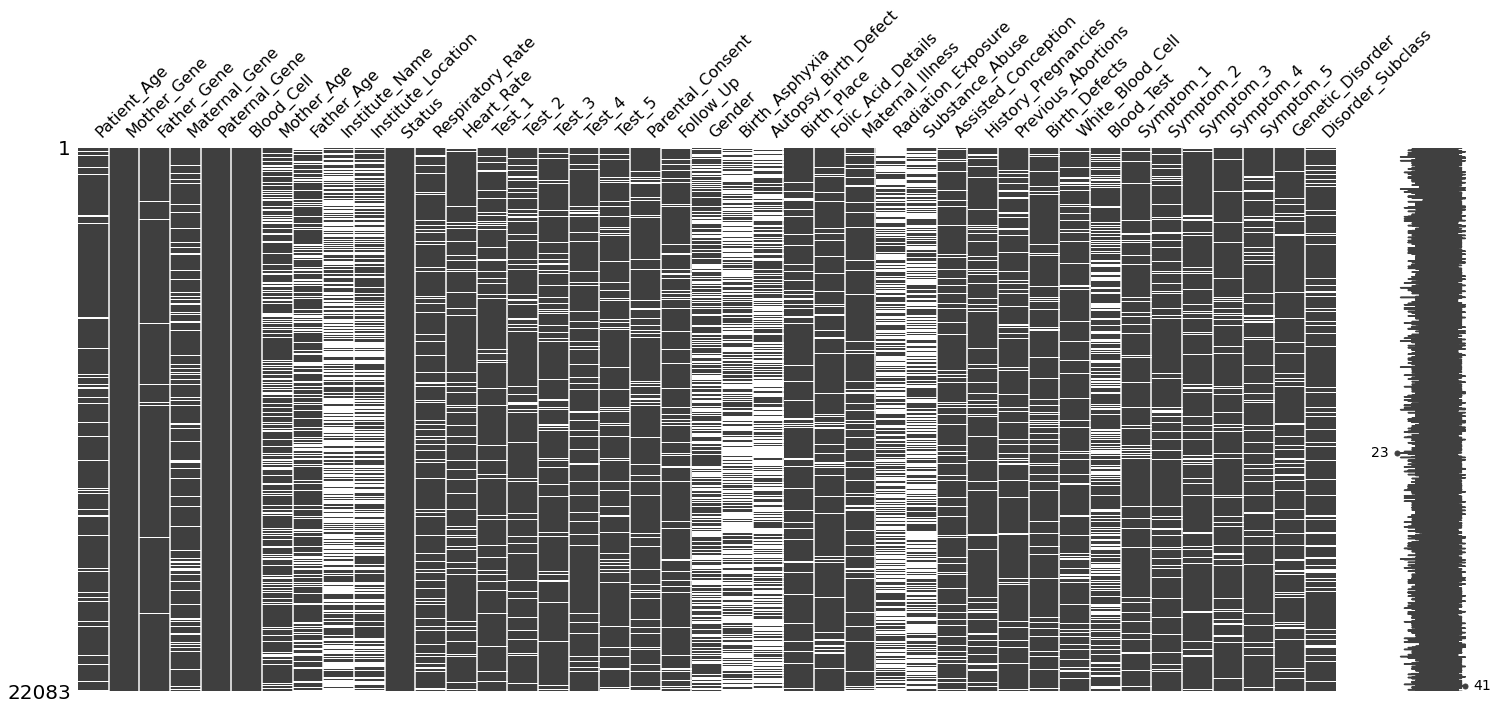

In [63]:
msno.matrix(train_data)
plt.show()

With the identification of all null values, there is a lot more missing data then we initially found out for many of these columns, and even past 50% as well. But we will continue to evaluate the data and come back to how we can handle the missing data.

## Categorical Features

In [64]:
train_data.dtypes

Patient_Age             float64
Mother_Gene              object
Father_Gene              object
Maternal_Gene            object
Paternal_Gene            object
Blood_Cell              float64
Mother_Age              float64
Father_Age              float64
Institute_Name           object
Institute_Location       object
Status                   object
Respiratory_Rate         object
Heart_Rate               object
Test_1                  float64
Test_2                  float64
Test_3                  float64
Test_4                  float64
Test_5                  float64
Parental_Consent         object
Follow_Up                object
Gender                   object
Birth_Asphyxia           object
Autopsy_Birth_Defect     object
Birth_Place              object
Folic_Acid_Details       object
Maternal_Illness         object
Radiation_Exposure       object
Substance_Abuse          object
Assisted_Conception      object
History_Pregnancies      object
Previous_Abortions      float64
Birth_De

In [65]:
catData = train_data.select_dtypes('object')
catData.head().T

,0,1,2,3,4
Mother_Gene,Yes,Yes,Yes,Yes,Yes
Father_Gene,No,Yes,No,No,No
Maternal_Gene,Yes,No,No,Yes,NaN
Paternal_Gene,No,No,No,No,Yes
Institute_Name,Boston Specialty & Rehabilitation Hospital,St. Margaret's Hospital For Women,NaN,NaN,Carney Hospital
Institute_Location,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...","1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...","300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42..."
Status,Alive,Deceased,Alive,Deceased,Alive
Respiratory_Rate,Normal (30-60),Tachypnea,Normal (30-60),Tachypnea,Tachypnea
Heart_Rate,Normal,Normal,Tachycardia,Normal,Tachycardia
Parental_Consent,Yes,Yes,Yes,Yes,NaN


All of these columns may provide useful information for evaluation, except for `Institute_Name` and `Institute_Location`. But I need to check if this is a 1 to 1 correlation or if there are problems within these columns.

#### Institute_Name and Institute_Location Evaluation

In [66]:
catData[['Institute_Name', 'Institute_Location']].nunique()

Institute_Name        26
Institute_Location    25
dtype: int64

It looks like there is one more Institute_Name than Institute_Locations.

In [67]:
# Zip the corresponding institute name and location per row
institute_dict = dict(zip(train_data['Institute_Name'], train_data['Institute_Location']))

# Then find the associated number of institute per location
flipped = {}
  
for key, value in institute_dict.items():
    if value not in flipped:
        flipped[value] = [key]
    else:
        flipped[value].append(key)

for key, value in flipped.items():
    print(key, ' : ', len(value))
    print()

44 BINNEY ST
FENWAY/KENMORE, MA 02115
(42.33734993862189, -71.1071702648531)  :  2

nan  :  1

51 BLOSSOM ST
CENTRAL, MA 02114
(42.36327718561898, -71.0668523937257)  :  1

818 HARRISON AV
SOUTH END, MA 02118
(42.335925371008436, -71.07378404269969)  :  3

88 EAST NEWTON ST
SOUTH END, MA 02118
(42.3371094801158, -71.07139912234962)  :  4

55 FRUIT ST
CENTRAL, MA 02114
(42.36247485742686, -71.06924724545246)  :  2

736 CAMBRIDGE ST
ALLSTON/BRIGHTON, MA 02135
(42.349656455743144, -71.14822103232248)  :  1

59 TOWNSEND ST
ROXBURY, MA 02119
(42.31856289432221, -71.09165569529381)  :  1

125 NASHUA ST
CENTRAL, MA 02114
(42.36764789068138, -71.06564730220646)  :  1

125 PARKER HILL AV
JAMAICA PLAIN, MA 02120
(42.329611374844326, -71.10616871232227)  :  1

90 CUSHING AV
DORCHESTER, MA 02125
(42.314030311294516, -71.06406449543488)  :  2

75 FRANCIS ST
FENWAY/KENMORE, MA 02115
(42.33587602903896, -71.10741054246668)  :  1

170 MORTON ST
ROSLINDALE, MA 02130
(42.30025000839615, -71.107379104455

It looks like some locations have multiple institutes associated with it. This makes these columns difficult to be valuable or valid, given some google searches confirm different institutes rather than the same institute with different names. Also in the context of identifying disorders, institute name and location are not significant. So I will drop these columns.

In [68]:
train_data.drop(columns=["Institute_Name", "Institute_Location"], inplace=True)
catData = train_data.select_dtypes('object')

In [75]:
cols  = catData

plt.style.use('seaborn-dark')
fig, ax = plt.subplots(len(cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cols): 
    sns.countplot(data = catData, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

KeyboardInterrupt: 

<Figure size 1080x3240 with 0 Axes>

## Numerical Features

In [ ]:
train_data.dtypes

In [ ]:
numData = train_data.select_dtypes('float64')

In [ ]:
numData.describe().T

In [ ]:
numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

* There are no variation within the Test columns.
* `Previous_Abortions` and the `symptom` columns look to have defined categorical type data. 
* `Patient_Age`, `Blood_Cell`, `Mother_Age`, `Father_Age`, and `White_Blood_Cell` are continuous data.

#### Test Columns

In [ ]:
numData.Test_1.value_counts()

In [ ]:
numData.Test_2.value_counts()

In [ ]:
numData.Test_3.value_counts()

In [ ]:
numData.Test_4.value_counts()

In [ ]:
numData.Test_5.value_counts()

Looking at the `value_counts` among the 5 different tests, there is actually 0 variations as they are 0 for Test 1, 2, 3, and 5, with Test 4 being only 1.

In [ ]:
train_data.drop(columns=["Test_1", "Test_2", "Test_3", "Test_4", "Test_5"], inplace=True)

Thus I dropped these columns as well.

#### Symptom Columns

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(12,8))
train_data.Symptom_1.value_counts(dropna=False).plot(kind='bar', ax=ax[0])
ax[0].set_title('Symptom_1')

train_data.Symptom_2.value_counts(dropna=False).plot(kind='bar', ax=ax[1])
ax[1].set_title('Symptom_2')

train_data.Symptom_3.value_counts(dropna=False).plot(kind='bar', ax=ax[2])
ax[2].set_title('Symptom_3')

train_data.Symptom_4.value_counts(dropna=False).plot(kind='bar', ax=ax[3])
ax[3].set_title('Symptom_4')

train_data.Symptom_5.value_counts(dropna=False).plot(kind='bar', ax=ax[4])
ax[4].set_title('Symptom_5')

for x in range(5):
    ax[x].set_xlabel('Value')
    
ax[0].set_ylabel('Count')

In [ ]:
train_data.groupby(['Genetic_Disorder',"Symptom_1"]).size().unstack(fill_value=0)

In [ ]:
train_data.groupby(['Genetic_Disorder',"Symptom_2"]).size().unstack(fill_value=0)

In [ ]:
train_data.groupby(['Genetic_Disorder',"Symptom_1"]).size().unstack(fill_value=0).hist(figsize=(15,10))
plt.show()

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=train_data)

### Missing Target Data

In [ ]:
train_data.Disorder_Subclass.value_counts(dropna=False)

In [ ]:
train_data.Genetic_Disorder.value_counts(dropna=False) 

In [ ]:
missing_data = train_data[['Disorder_Subclass', 'Genetic_Disorder']].isnull().sum(axis=1)
missing_data.value_counts()/len(missing_data) * 100

In [ ]:
# train_data = train_data[missing_data != 2]

In [ ]:
hosptial_dict = dict(zip(train_data['Location of Institute'], train_data['Institute Name']))

# from dictionary using flip
flipped = {}
  
for key, value in hosptial_dict.items():
    if value not in flipped:
        flipped[value] = [key]
    else:
        flipped[value].append(key)
  
# printing result
for key, value in flipped.items():
    print(key, ' : ', len(value))
    
flipped.keys()